# 全局设置

In [4]:
# 导入包并且确保包的版本符合要求
import sys
import sklearn
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

assert sys.version_info >= (3, 5)
assert sklearn.__version__ >= "0.20"

# 配置全局绘图设置
%matplotlib widget
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 保存图片的位置
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
# 如果项目文件夹不存在，就创建一个
os.makedirs(IMAGES_PATH, exist_ok = True)

# 将图片保存到指定位置
def save_fig(fig, fig_id, tight_layout=True, fig_extension="png", dpi=300):
    '''
    将图片保存到指定位置
    
    :param fig: 当前图片的Figure对象；
    :param fig_id: 保存的文件名；
    :param tight_layout: 是否使用tight layout，默认是True
    :param fig_extension: 图片的扩展名，默认是'png'
    :param resolution: 图片的像素点个数
    :return:
    '''
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    fig.set_tight_layout(tight_layout)
    fig.savefig(path, format=fig_extension, dpi=dpi)
    print('图片已保存', fig_id)

# 获取数据

## 下载数据

In [3]:
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# 将线上数据文件保存到本地，记得连vpn
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    '''
    将线上数据文件保存到本地
    在本地创建一个housing_path文件夹，其中放置了housing_url指向的housing.tgz文件
    然后将其中内容解压到housing_path文件夹中
    
    :param housing_url: 线上数据压缩包地址
    :param housing_path: 用来存放压缩包和解压后数据的本地地址；
    :return:
    '''
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    
    # 将线上数据压缩包下载到本地文件夹中
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    # 将数据压缩包解压，可以获得housing.csv文件
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    print('数据下载已完成')
    
fetch_housing_data()

数据下载已完成


In [5]:
# 用来加载本地房价数据
def load_housing_data(housing_path = HOUSING_PATH)->pd.DataFrame:
    '''
    用来加载本地房价数据
    
    :param housing_path: 本地房价数据文件地址
    :return: 房价数据
    '''
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

load_housing_data()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## 大致查看一下数据的情况

In [6]:
housing = load_housing_data()
# 可以看到ocean_proximity是字符数据，其可能是分类属性
housing[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
# 数据总览
# 可以看到total_bedrooms只有20433数据，可能是缺失数据
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
# 查看ocean_proximity变量有几种类别
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


图片已保存 变量直方分布图


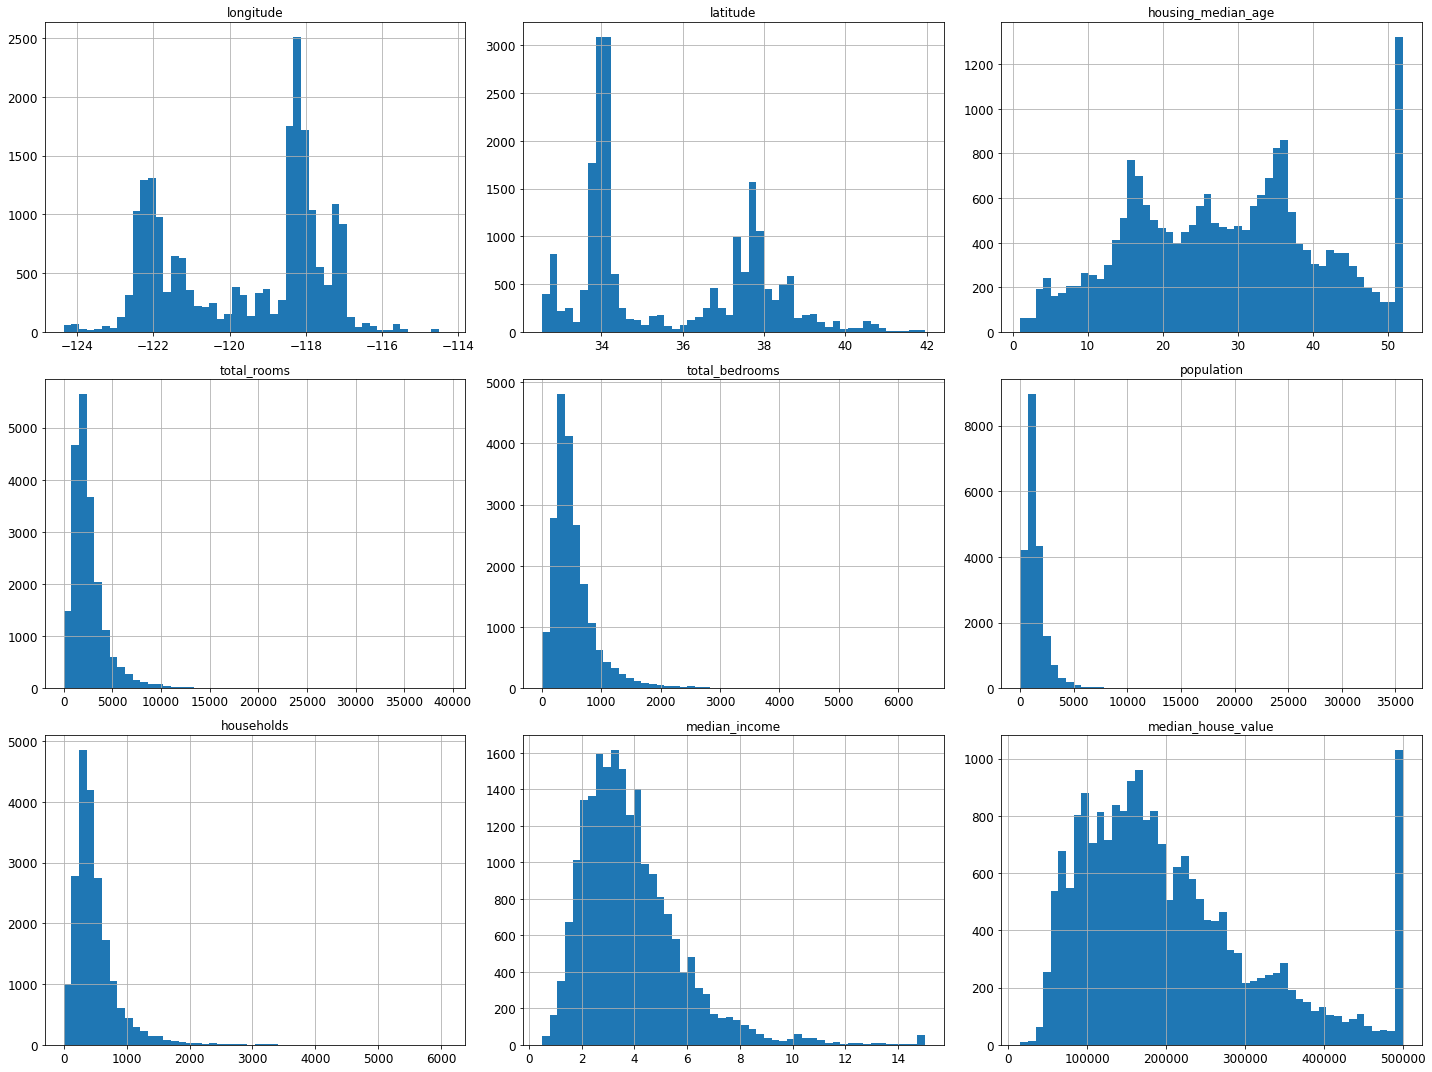

In [32]:
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))
fig = plt.gcf()
save_fig(fig, '变量直方分布图')

## 生成测试集